In [108]:
import random as rand
import networkx as nx
import matplotlib.pyplot as plt
#from simpy import Environment

In [128]:
def crear_red():
    # Crear un grafo vacío
    red = nx.Graph()
    # Agregar nodos al grafo
    num_nodes = rand.randint(5,10)
    for i in range(num_nodes):
        red.add_node(i)

    num_edges = 20
    for _ in range(num_edges):
        u = rand.randint(0, num_nodes - 1)
        v = rand.randint(0, num_nodes - 1)
        if u != v and not red.has_edge(u, v):
            red.add_edge(u, v)
    
    array = [red, num_nodes]
    return array
      

In [177]:
def asignar_sensores(red):
    array = red[0]
    nodo = []
    for j in array.nodes:
        nodo.append([
            SensorPH(),
            SensorTurbidez(),
            SensorTemperatura(),
            #SensorHumedad()
        ])
    return nodo


In [251]:
def SensorPH():
    ph = []
    for i in range(96):
        ph.append(rand.uniform(7.8, 8.0))
    return ph

def SensorTurbidez():
    tur_fh = []
    tur_lh = []
    for i in range(96):
        if i >50:
            tur_lh.append(rand.uniform(9, 11))
        else:
            tur_fh.append(rand.uniform(9, 11))
    tur_fh.sort()
    tur_lh.sort(reverse=True)
    return tur_fh+tur_lh


def SensorTemperatura():
    tem_fh = []
    tem_lh = []
    for i in range(96):
        if i >50:
            tem_lh.append(rand.uniform(5, 10))
        else:
            tem_fh.append(rand.uniform(5, 10))
    tem_fh.sort()
    tem_lh.sort(reverse=True)
    return tem_fh+tem_lh
"""
def SensorHumedad():
    hum_fh = []
    hum_lh = []
    for i in range(96):
        if i >60:
            hum_lh.append(rand.uniform(60, 70))
        else:
            hum_fh.append(rand.uniform(60, 70))
    hum_fh.sort()
    hum_lh.sort(reverse=True)
    
    return hum_fh+hum_lh
"""


'\ndef SensorHumedad():\n    hum_fh = []\n    hum_lh = []\n    for i in range(96):\n        if i >60:\n            hum_lh.append(rand.uniform(60, 70))\n        else:\n            hum_fh.append(rand.uniform(60, 70))\n    hum_fh.sort()\n    hum_lh.sort(reverse=True)\n    \n    return hum_fh+hum_lh\n'

In [252]:
def graficar_nodo(array, nodo): #red es red creada en un array en donde esta la red y el numero de nodos
    nx.draw(array[0], with_labels=True)
    plt.show()
    num_nodo = array[1] - 1 # sacamos el num de nodos
    x = rand.randint(0, num_nodo) #x es el numero del Nodo elegido
    nodo_x = nodo[x] # saco 1 nodo y me devuelve 1 solo arreglo

    
    ph = nodo_x[0]
    tur = nodo_x[1]
    tem = nodo_x[2]
   #hum = nodo_x[3]  
    
    y = list(range(0, 1440, 15))

    fig, axes = plt.subplots(3, 1, figsize=(14,8))
    axes[0].scatter(y, ph, color = 'purple', s=10)
    axes[0].set_title('pH')
    axes[0].set_xlabel('tiempo min')
    axes[0].set_ylabel('pH')

    axes[1].scatter(y, tur, color = 'orange', s=10 )
    axes[1].set_title('Turbidez')
    axes[1].set_xlabel('tiempo min')
    axes[1].set_ylabel('NTU')

    axes[2].plot(y, tem, color = 'green')
    axes[2].set_title('Temperatura')
    axes[2].set_xlabel('tiempo min')
    axes[2].set_ylabel('C°')

    fig.tight_layout(pad=4)
    fig.suptitle(f'Nodo: {x}', fontsize = 20)
    
    plt.show()
    
    fig, ax = plt.subplots(figsize = (10, 4))
    for i in nodo_x:
        ax.scatter(x = list(range(0, 1440, 15)), y = i , s = 8 )
        ax.set_title(f'Nodo: {x}')
    
    plt.show()


                                 

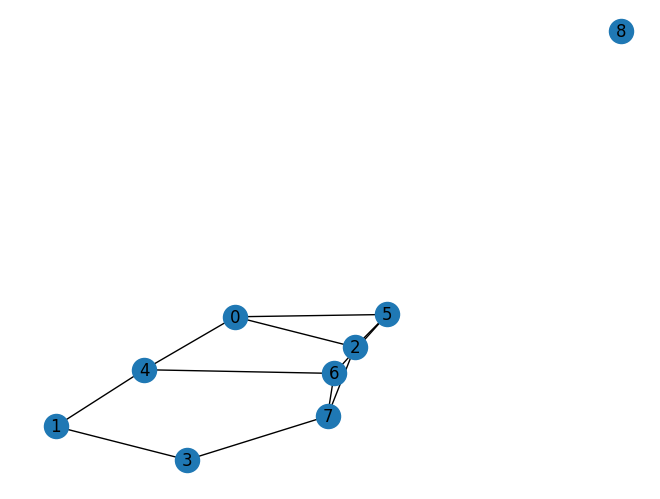

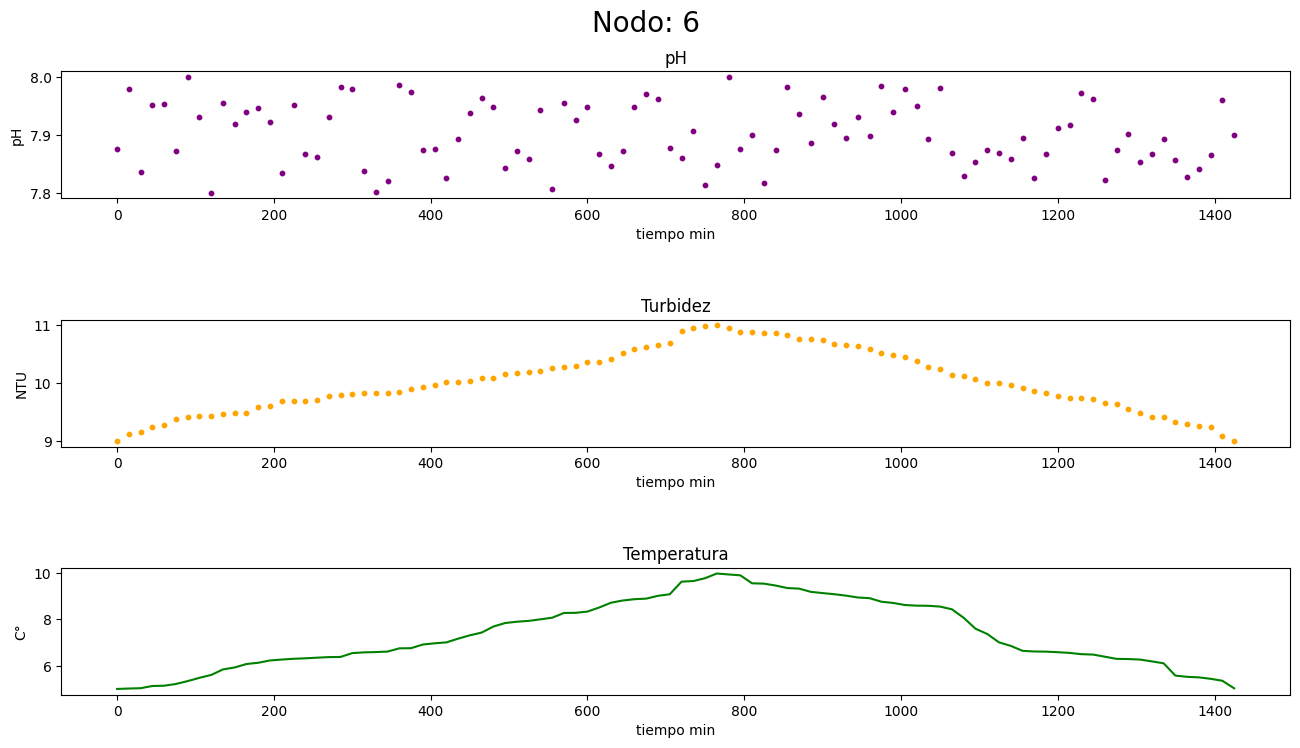

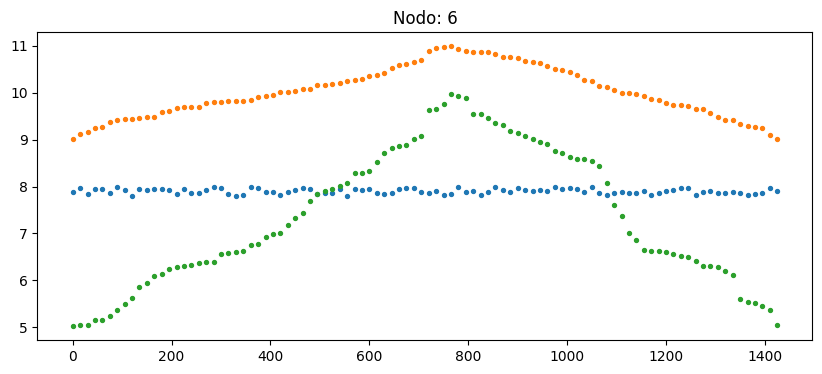

In [258]:
red = crear_red()
sen = asignar_sensores(red)
graficar_nodo(red, sen)